In [1]:
import numpy as np 
from io import StringIO
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Inverting dictionaries to map index -> Diagnosiscode
female_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/female_count.types')
female_types_inv = {v: k for k, v in female_types.items()}
male_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/male_count.types')
male_types_inv = {v: k for k, v in male_types.items()}
mixed_types = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/mixed_count.types')
mixed_types_inv = {v: k for k, v in mixed_types.items()}

In [3]:
len(female_types)

857

In [4]:
female_count = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/female_count.npy')
female_count = np.rint(female_count)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
female_count_icd = np.chararray(female_count.shape, itemsize=8)            
it = np.nditer(female_count, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): female_count_icd[it.multi_index] = female_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
female_count = pd.DataFrame(female_count_icd)
female_count.rename(columns=female_types_inv)
print(female_count)
# Save mixed patients to csv
pd.DataFrame(female_count).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/female_count.csv")

      0    1    2    3    4    5    6    7    8    9    ...  847  848  849  \
0     b''  b''  b''  b''  b''  b''  b''  b''  b''  b''  ...  b''  b''  b''   
1     b''  b''  b''  b''  b''  b''  b''  b''  b''  b''  ...  b''  b''  b''   
2     b''  b''  b''  b''  b''  b''  b''  b''  b''  b''  ...  b''  b''  b''   
3     b''  b''  b''  b''  b''  b''  b''  b''  b''  b''  ...  b''  b''  b''   
4     b''  b''  b''  b''  b''  b''  b''  b''  b''  b''  ...  b''  b''  b''   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9995  b''  b''  b''  b''  b''  b''  b''  b''  b''  b''  ...  b''  b''  b''   
9996  b''  b''  b''  b''  b''  b''  b''  b''  b''  b''  ...  b''  b''  b''   
9997  b''  b''  b''  b''  b''  b''  b''  b''  b''  b''  ...  b''  b''  b''   
9998  b''  b''  b''  b''  b''  b''  b''  b''  b''  b''  ...  b''  b''  b''   
9999  b''  b''  b''  b''  b''  b''  b''  b''  b''  b''  ...  b''  b''  b''   

      850  851  852  853  854  855  856  
0     b''  b''  b''  

In [6]:
female_count = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/female_count.npy')
female_count = np.rint(female_count)
df_female = pd.DataFrame(female_count)
df_female = df_female.rename(columns=female_types_inv)
pd.DataFrame(df_female).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/female_count.csv")

In [7]:
male_count = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/male_count.npy')
male_count = np.rint(male_count)
df_male = pd.DataFrame(male_count)
df_male = df_male.rename(columns=male_types_inv)
pd.DataFrame(df_male).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/male_count.csv")

In [8]:
mixed_count = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/mixed_count.npy')
mixed_count = np.rint(mixed_count)
df_mixed = pd.DataFrame(mixed_count)
df_mixed = df_mixed.rename(columns=mixed_types_inv)
pd.DataFrame(df_mixed).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/mixed_count.csv")

In [93]:
len(female_types)

857

In [6]:
mixed_count = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/mixed_count.npy')
mixed_count = np.rint(mixed_count)
print(mixed_count.shape)
#male_generated_patients = np.array_str(male_generated_patients)
#for x in np.nditer(male_generated_patients, op_flags=['readwrite'], flags=['multi_index']):
#        if(x==1): x = males_types[x]
mixed_count_icd = np.chararray(mixed_count.shape, itemsize=7)            
it = np.nditer(mixed_count, flags=['multi_index'])
while not it.finished:
    #print ("%d <%s>" % (it[0], it.multi_index)),
    if(it[0] == 1): mixed_count_icd[it.multi_index] = mixed_types_inv[it.multi_index[1]]
    #print()
    it.iternext()
    
# Save mixed patients to csv
pd.DataFrame(mixed_count_icd).to_csv("/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/mixed_count.csv")

(10000, 906)


In [17]:
# Count
mixed_count = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/mixed_count.csv')
male_count = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/male_count.csv')
female_count = pd.read_csv('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/COUNT_PATIENTS/female_count.csv')

In [18]:
# Invert
#males = males.T
#females = females.T
#mixed = mixed.T
patient_1 =female_count

,Unnamed: 0,D_67,D_69,D_950,D_48,D_962,D_01,D_300,D_70,D_29,...,D_827,D_365,D_198,D_193,D_248,D_112,D_342,D_093,D_775,D_513
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
#for i in range(855):
#    females.rename(columns={ females.columns[i]: "DIAGNOSIS_ICD" }, inplace = True)
#females.rename(columns={females.columns[0]: "DIAGNOSIS_ICD" }, inplace = True)
#males.rename(columns={females.columns[0]: "DIAGNOSIS_ICD" }, inplace = True)

#females.head()

In [87]:
# Count
mixed_count.rename(columns={mixed_count.columns[0]: "SUBJECT_ID"}, inplace = True)
male_count.rename(columns={male_count.columns[0]: "SUBJECT_ID"}, inplace = True)
female_count.rename(columns={female_count.columns[0]: "SUBJECT_ID"}, inplace = True)

In [88]:
# Count
mixed_count = pd.melt(mixed_count, id_vars=["SUBJECT_ID"])
male_count = pd.melt(male_count, id_vars=["SUBJECT_ID"])
female_count = pd.melt(female_count, id_vars=["SUBJECT_ID"])

In [89]:
# Find patient by SUBJECT_ID
#print(females_transformed.loc[females_transformed['SUBJECT_ID'] == 3])

In [90]:
# Sort rows by SUBJECT ID
mixed_count = mixed_count.sort_values(by=['SUBJECT_ID'], ascending = True)
male_count = male_count.sort_values(by=['SUBJECT_ID'], ascending = True)
female_count = female_count.sort_values(by=['SUBJECT_ID'], ascending = True)

# Drop NaN rows
mixed_count_icd = mixed_count.dropna()
male_count_icd = male_count.dropna()
female_count_icd = female_count.dropna()

In [91]:
# Filter mixed patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
mixed_ischemic = mixed_count_icd[mixed_count_icd.value.str.contains("^b'D_41.+", regex=True, na=False)]
mixed_heart_disease = mixed_count_icd[mixed_count_icd.value.str.contains("b'D_429", regex=True, na=False)]
mixed_diabetes = mixed_count_icd[mixed_count_icd.value.str.contains("^b'D_25", na=False)]
mixed_ischemic_ids = mixed_ischemic["SUBJECT_ID"].tolist()
mixed_heart_disease_ids = mixed_heart_disease["SUBJECT_ID"].tolist()
mixed_diabetes_ids = mixed_diabetes["SUBJECT_ID"].tolist()

In [92]:
# Filter female patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
females_ischemic = female_count_icd[female_count_icd.value.str.contains("^b'D_41.+", regex=True, na=False)]
females_heart_disease = female_count_icd[female_count_icd.value.str.contains("b'D_429", regex=True, na=False)]
females_diabetes = female_count_icd[female_count_icd.value.str.contains("^b'D_25", na=False)]
females_ischemic_ids = females_ischemic["SUBJECT_ID"].tolist()
females_heart_disease_ids = females_heart_disease["SUBJECT_ID"].tolist()
females_diabetes_ids = females_diabetes["SUBJECT_ID"].tolist()

In [93]:
# Filter male patients for with ischemic diseases, heart diseases, diabetes and cardiovascular ones
# also getting the SUBJECT IDs of each
males_ischemic = male_count_icd[male_count_icd.value.str.contains("^b'D_41.+", regex=True, na=False)]
males_heart_disease = male_count_icd[male_count_icd.value.str.contains("b'D_429", regex=True, na=False)]
males_diabetes = male_count_icd[male_count_icd.value.str.contains("^b'D_25", na=False)]
males_ischemic_ids = males_ischemic["SUBJECT_ID"].tolist()
males_heart_disease_ids = males_heart_disease["SUBJECT_ID"].tolist()
males_diabetes_ids = males_diabetes["SUBJECT_ID"].tolist()

In [94]:
# get top 10 most ICD9-Codes for mixed patients
n = 20
mixed_diagnoses_top10 = mixed_count_icd['value'].value_counts()[:n]
print(mixed_diagnoses_top10)

b''                             8758248
b'?'                               6195
b'>'                               4993
b'\x00\x00\x00\x00\x00\x00D'       3591
b'\x00\x00\x00\x00\x00D_'          3358
b'='                               1908
b'D_01'                            1780
b'D_05'                            1405
b'D_72'                            1255
b'D_300'                           1242
b'D_140'                           1095
b'D_29'                             954
b'@'                                908
b'D_76'                             902
b'D_24'                             899
b'D_85'                             832
b'D_273'                            807
b'D_500'                            788
b'D_308'                            710
b'D_28'                             710
Name: value, dtype: int64


In [95]:
# get top 10 most ICD9-Codes for male patients
n = 20
males_ischemic_top10 = male_count_icd['value'].value_counts()[:n]
print(males_ischemic_top10)

b''                                 5148731
b'\x00\x00\x80?'                      26534
b'\x00\x00\x00\x00\x00\x00\x80?'      25468
b'\x00\x00\x00\x00\x00\x00\x00@'       8029
b'\x00\x00\x00@'                       7572
b'D_01'                                3219
b'\x00\x00\x80?\x00\x00\x80?'          3182
b'D_72'                                2438
b'\x00\x00\x00\x00\x00\x00@@'          2381
b'D_140'                               2251
b'\x00\x00@@'                          2119
b'\x00\x00\x00@\x00\x00\x80?'          1465
b'\x00\x00\x80?\x00\x00\x00@'          1420
b'D_273'                               1372
b'D_84'                                1369
b'D_05'                                1361
b'D_28'                                1319
b'D_85'                                1287
b'D_500'                               1277
b'D_76'                                1126
Name: value, dtype: int64


In [96]:
# get top 10 most ICD9-Codes for female patients
n = 20
females_ischemic_top10 = female_count_icd['value'].value_counts()[:n]
print(females_ischemic_top10)

b''         8518556
b'D_300'       1371
b'D_01'        1329
b'D_72'         891
b'D_24'         843
b'D_84'         791
b'D_29'         775
b'D_85'         775
b'D_140'        725
b'D_28'         653
b'D_76'         623
b'D_05'         615
b'D_939'        531
b'D_500'        525
b'D_44'         525
b'D_273'        493
b'D_8'          474
b'D_308'        444
b'D_16'         430
b'D_1'          425
Name: value, dtype: int64


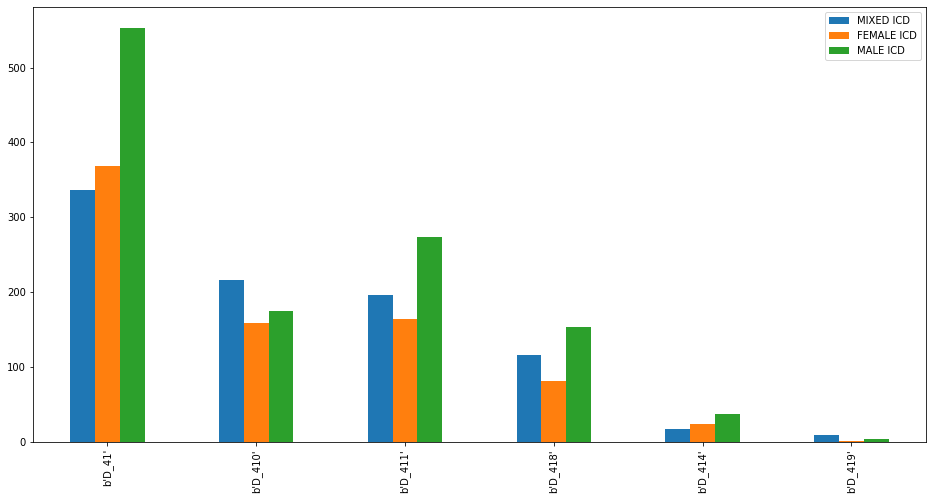

In [97]:
# Compare top n ICD9-Codes occurences for ischemic diseases
n = 50

graph_df = mixed_ischemic['value'].value_counts(normalize=False)[:n].rename('MIXED ICD').to_frame()\
            .join(females_ischemic['value'].value_counts(normalize=False)[:n].rename('FEMALE ICD').to_frame())\
               .join(males_ischemic['value'].value_counts(normalize=False)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

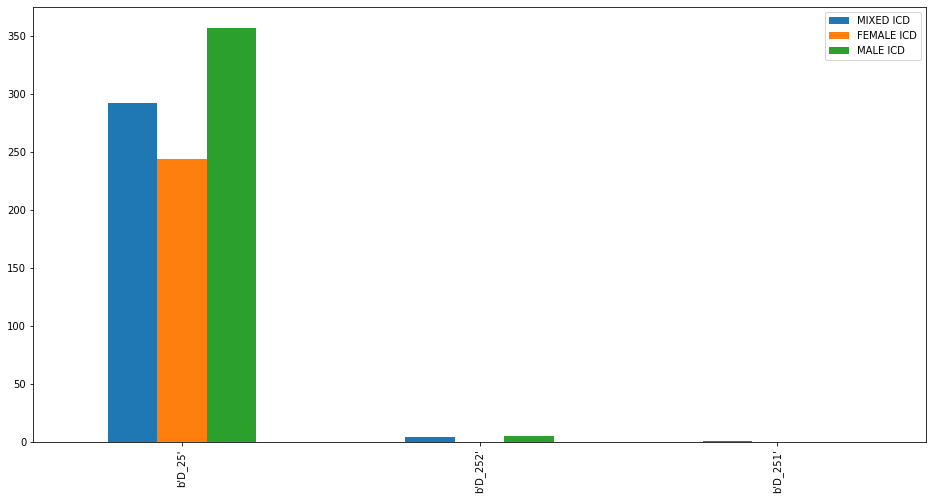

In [98]:
# Compare top n ICD9-Codes occurences for diabetic diseases
n = 50

graph_df = mixed_diabetes['value'].value_counts(normalize=False)[:n].rename('MIXED ICD').to_frame()\
            .join(females_diabetes['value'].value_counts(normalize=False)[:n].rename('FEMALE ICD').to_frame())\
               .join(males_diabetes['value'].value_counts(normalize=False)[:n].rename('MALE ICD').to_frame())

graph_df.plot(kind='bar',figsize=(16, 8))

In [99]:
# Get ids of mixed patients with heart disease + any type of diabetes
mixed_heart_and_diabetes = mixed_diagnoses_icd[mixed_diagnoses_icd["SUBJECT_ID"].isin(mixed_ischemic_ids)]
mixed_heart_and_diabetes = mixed_heart_and_diabetes[mixed_heart_and_diabetes ["SUBJECT_ID"].isin(mixed_diabetes_ids)]
mixed_heart_and_diabetes["SUBJECT_ID"].nunique() 

NameError: name 'mixed_diagnoses_icd' is not defined

In [ ]:
# Get ids of male patients with heart disease + any type of diabetes
males_heart_and_diabetes = males_diagnoses_icd[male_diagnoses_icd["SUBJECT_ID"].isin(males_ischemic_ids)]
males_heart_and_diabetes = males_heart_and_diabetes[male_heart_and_diabetes ["SUBJECT_ID"].isin(males_diabetes_ids)]
males_heart_and_diabetes["SUBJECT_ID"].nunique() 

In [ ]:
# Get ids of female patients with heart disease + any type of diabetes
females_heart_and_diabetes = females_diagnoses_icd[females_diagnoses_icd["SUBJECT_ID"].isin(females_ischemic_ids)]
females_heart_and_diabetes = females_heart_and_diabetes[females_heart_and_diabetes ["SUBJECT_ID"].isin(females_diabetes_ids)]
females_heart_and_diabetes["SUBJECT_ID"].nunique() 

In [277]:
mixed_transformed.shape

(9060000, 3)

In [96]:
test = np.load('/Users/nicenoize/Documents/Bachelorarbeit/mimic-iii-clinical-database-1.4/mixed_binary_3digit.matrix')
test.shape

(46520, 906)